In [ ]:
import pandas as pd
# df_test=pd.read_csv('test.csv')
df=pd.read_csv('train(2).csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

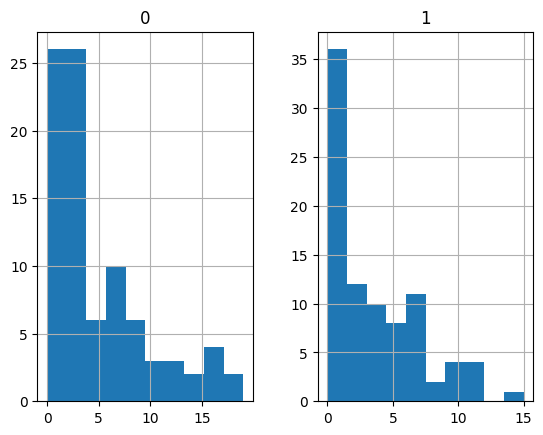

In [ ]:
import matplotlib.pyplot as plt
survival=pd.crosstab(df.Age,df.Survived)
survival.hist()
plt.show()

In [ ]:
import numpy as np

df[['Age']]=df[['Age']].fillna(np.mean(df['Age']))
df[['Cabin']].value_counts()

Cabin      
C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
C101           1
B94            1
B86            1
B82 B84        1
T              1
Length: 147, dtype: int64

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
!pip install sklearn
print("Done")

  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2951 sha256=f925b7e77a4359f3cb1a2898248d6c011e4709055920c9270bc2758854b7ad5c
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn
Done


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le.fit(df[['Cabin']])
df["Cabin"] = le.fit_transform(df["Cabin"])

le.fit(df[['Embarked']])
df["Embarked"] = le.transform(df["Embarked"])

le.fit(df[['Sex']])
df["Cabin"] = le.fit_transform(df["Cabin"])

df[['Cabin','Sex','Embarked']]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Cabin,Sex,Embarked
0,147,male,2
1,81,female,0
2,147,female,2
3,55,female,2
4,147,male,2
...,...,...,...
886,147,male,2
887,30,female,2
888,147,female,2
889,60,male,0


In [ ]:
x=df.drop(['Survived','Name','Ticket','Sex'],axis=1)
y=df['Survived']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3,p=2)

knn.fit(x,y)
y_pred=knn.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [ ]:
df[['Embarked']].value_counts()

Embarked
2           644
0           168
1            77
3             2
dtype: int64

In [ ]:
import sklearn.metrics

accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)

accuracy

0.8268156424581006

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train,y_train)

predicted= model.predict([[0,1,2,3,4,5,6,7]])
print ("Predicted Value:", predicted)

Predicted Value: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
model.score(x_test,y_test)

0.6927374301675978

In [ ]:
model.predict(x_test[:10])

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
model.predict_proba(x_test[:10])

array([[0.69291105, 0.30708895],
       [0.85482435, 0.14517565],
       [0.9171653 , 0.0828347 ],
       [0.69348995, 0.30651005],
       [0.69638005, 0.30361995],
       [0.26999211, 0.73000789],
       [0.89318646, 0.10681354],
       [0.97668682, 0.02331318],
       [0.86919281, 0.13080719],
       [0.41467827, 0.58532173]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1)
model.fit(x, y)

y_predicteds = model.predict(x)
y_predicteds

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [ ]:
acc_train = model.score(x_test, y_test)
acc_train

0.6815642458100558

In [ ]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(binarize=0.0)

clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)
# clf.score(x_train,y_train)
# clf.score(x_test,y_test)

Accuracy: 0.6256983240223464


In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       105
           1       0.58      0.34      0.43        74

    accuracy                           0.63       179
   macro avg       0.61      0.58      0.57       179
weighted avg       0.62      0.63      0.60       179



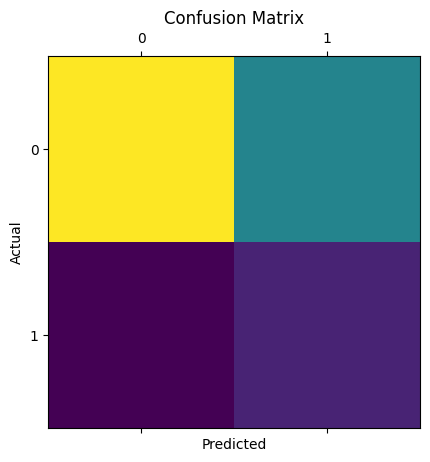

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_pred,y_test)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pickle

model_pkl_file='Titanic_train.pkl'

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)